<a href="https://colab.research.google.com/github/lunar0926/newspaper_corpus/blob/main/250215_bareun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 바른 형태소 분석기 리눅스 설치
!curl -LJks -H "uname:$(uname -a)" https://bareun.ai/api/get -o bareun-linux.deb
!ls

bareun-linux.deb  merged2022.zip  nohup.out  sample_data


In [ ]:
# 설치
!uname -a
!dpkg -i bareun-linux.deb

Linux ea2261786c1d 6.1.85+ #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux
(Reading database ... 123650 files and directories currently installed.)
Preparing to unpack bareun-linux.deb ...
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
Configuration file /etc/systemd/system/bareun.service is marked executable. Please remove executable permission bits. Proceeding anyway.
Removed /etc/systemd/system/multi-user.target.wants/bareun.service.
Unpacking bareun (2.3.1) over (2.3.1) ...
^C


In [ ]:
#  환경설정
%env BAREUN_ROOT="/opt/bareun"
%env LD_LIBRARY_PATH="/opt/bareun/lib"
!BAREUN_ROOT="/opt/bareun" LD_LIBRARY_PATH="/opt/bareun/lib" nohup /opt/bareun/bin/bareun&

env: BAREUN_ROOT="/opt/bareun"
env: LD_LIBRARY_PATH="/opt/bareun/lib"
nohup: appending output to 'nohup.out'


In [ ]:
# 실행 정보
!ps -ef | grep bareun

root         715       1 99 Dec20 ?        2-03:54:11 [bareun] <defunct>
root      376095       1 99 Dec21 ?        1-23:45:32 [bareun] <defunct>
root      592987       1 99 Dec21 ?        2-01:39:40 [bareun] <defunct>
root      833038       1 63 05:49 ?        00:00:01 /opt/bareun/bin/bareun
root      833076  592861  0 05:49 ?        00:00:00 /bin/bash -c ps -ef | grep bareun
root      833078  833076  0 05:49 ?        00:00:00 grep bareun


In [ ]:
!BAREUN_ROOT="/opt/bareun" LD_LIBRARY_PATH="/opt/bareun/lib" /opt/bareun/bin/bareun -reg koba-VAD6MMA-BFSU7XI-SYQYWYY-Y4MXHVA

2024-12-22 05:49:21.516694: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-22 05:49:21.520354: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/bareun/lib
2024-12-22 05:49:21.520382: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Use config file: /opt/bareun/config/bareun.json

------
200 OK
This apikey is already registered.


In [ ]:
# 라이브러리 설치
!pip install -U bareunpy

In [ ]:
import pandas as pd
from glob import glob

# 바른 형태소 분석기|
import sys
import bareunpy as brn
import google.protobuf.text_format as tf # 데이터를 구조화된 형태로 저장하고 전송. 태깅 결과를 일종의 메시지로서 가독성 좋게 보여주는 라이브러리

# 전처리
from tqdm import tqdm
import multiprocessing as mp
from multiprocessing import Pool
import numpy as np

In [ ]:
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [ ]:
# 아래에 "https://bareun.ai/"에서 이메일 인증 후 발급받은 API KEY("koba-...")를 입력해주세요. "로그인-내정보 확인"
API_KEY = "koba-VAD6MMA-BFSU7XI-SYQYWYY-Y4MXHVA" # <- 본인의 API KEY로 교체
t = brn.Tagger(API_KEY, "localhost", 5656) # tagger는 변수 t에 할당
res = t.tags(["안녕하세요. 정말 좋은 날씨네요."]) # t.tags()에 리스트로 한 문장을 입력
m = res.msg() # 분석 결과를 객체로 저장하여 변수 m에 할당

tf.PrintMessage(m, out=sys.stdout, as_utf8=True) # 분석 결과 객체 m을 가독성 좋게 표시.

sentences {
  text {
    content: "안녕하세요. 정말 좋은 날씨네요."
    length: 18
  }
  tokens {
    text {
      content: "안녕하세요."
      length: 6
    }
    morphemes {
      text {
        content: "안녕하"
        length: 3
      }
      tag: VA
      out_of_vocab: IN_BUILTIN_DICT
    }
    morphemes {
      text {
        content: "시"
        begin_offset: 3
        length: 1
      }
      tag: EP
      probability: 0.9998893
    }
    morphemes {
      text {
        content: "어요"
        begin_offset: 3
        length: 2
      }
      tag: EF
      probability: 0.98995674
    }
    morphemes {
      text {
        content: "."
        begin_offset: 5
        length: 1
      }
      tag: SF
      probability: 0.99979943
    }
    lemma: "안녕하"
    tagged: "안녕하/VA+시/EP+어요/EF+./SF"
  }
  tokens {
    text {
      content: "정말"
      begin_offset: 7
      length: 2
    }
    morphemes {
      text {
        content: "정말"
        begin_offset: 7
        length: 2
      }
      tag: MAG
      probabil

In [ ]:
#  객체 m으로부터 세부 정보를 확인할 때
print(f'length of tokens in sentences[0] is {len(m.sentences[0].tokens)}') # input으로 입력한 리스트에는 한 문장만 요소로 들어가있으므로 sentences[0]
print(f'length of morphemes of first token in sentences[0] is {len(m.sentences[0].tokens[0].morphemes)}') # 각 어절이 하나의 토큰이 된다.
print(f'lemma of first token in sentences[0] is {m.sentences[0].tokens[0].lemma}') # tokens[0]에 해당하는 어절의 lemma
print(f'first morph of first token in sentences[0] is {m.sentences[0].tokens[0].morphemes[0]}')
print(f'tag of first morph of first token in sentences[0] is {m.sentences[0].tokens[0].morphemes[0].tag}')

length of tokens in sentences[0] is 4
length of morphemes of first token in sentences[0] is 4
lemma of first token in sentences[0] is 안녕하
first morph of first token in sentences[0] is text {
  content: "\354\225\210\353\205\225\355\225\230"
  length: 3
}
tag: VA
out_of_vocab: IN_BUILTIN_DICT

tag of first morph of first token in sentences[0] is 38


In [ ]:
# spacy 설치
!python -m spacy download ko_core_news_lg


Aborted.


# 데이터

In [ ]:
n_partitions = 8_992_042 // 200_000
corpus_df = dd.read_parquet('corpus_df.parquet', npartitions=n_partitions, index_col='sentence_id')

In [ ]:
corpus_df.head()

[########################################] | 100% Completed | 909.73 ms


,sentence_id,untagged
0,NIRW2300000001.1.1,[영상]“위기를 이겨내고 일상으로” 부산 기관장 신년사
1,NIRW2300000001.1.2,취임 2년 차를 맞는 박형준 부산시장은 코로나19 위기를 이겨내고 있는 부산시민들에...
2,NIRW2300000001.1.3,"박 시장은 “코로나19는 번번이 우리의 희망의 길목을 막아섰고, 지금도 여전히 민생..."
3,NIRW2300000001.1.4,그러면서 “숱한 어려움을 헤쳐온 위대한 시민의 힘으로 2022년을 코로나를 극복하고...
4,NIRW2300000001.1.5,박 시장은 “치밀한 전략으로 2030세계박람회 유치를 위한 국제박람회기구 현지 실사...


In [ ]:
client = Client()
client

In [ ]:
client.close()

In [ ]:
def pos_tag_sentence(sentence):
    t = brn.Tagger(API_KEY, "localhost", 5656) # tagger는 변수 t에 할당
    try:
        res = t.tags([sentence])
        return list(res.pos())
    except Exception as e:
        print(f"Error tagging sentence: {sentence}")
        print(f"Error: {e}")
        return []

with ProgressBar():
    corpus_df['pos_tagged'] = corpus_df['untagged'].map_partitions(lambda x: x.apply(pos_tag_sentence))
    corpus_df = corpus_df.compute()

client.close()

# POS tagging

In [ ]:
corpus_df = pd.read_parquet('corpus_df.parquet')

In [ ]:
corpus_df.head()

,sentence_id,untagged
0,NIRW2300000001.1.1,[영상]“위기를 이겨내고 일상으로” 부산 기관장 신년사
1,NIRW2300000001.1.2,취임 2년 차를 맞는 박형준 부산시장은 코로나19 위기를 이겨내고 있는 부산시민들에...
2,NIRW2300000001.1.3,"박 시장은 “코로나19는 번번이 우리의 희망의 길목을 막아섰고, 지금도 여전히 민생..."
3,NIRW2300000001.1.4,그러면서 “숱한 어려움을 헤쳐온 위대한 시민의 힘으로 2022년을 코로나를 극복하고...
4,NIRW2300000001.1.5,박 시장은 “치밀한 전략으로 2030세계박람회 유치를 위한 국제박람회기구 현지 실사...


In [ ]:
# 데이터프레임 10개로 분할
split_corpus_df = np.array_split(corpus_df, 10) # split_corpus_df[0] ~ [9]
for i in range(10):
  split_corpus_df[i].to_parquet(f'split_corpus_df_{i}.parquet')

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
num_processes = mp.cpu_count() - 1
chunksize_divided = 100
API_KEY = "koba-VAD6MMA-BFSU7XI-SYQYWYY-Y4MXHVA" # <- 본인의 API KEY로 교체
t = brn.Tagger(API_KEY, "localhost", 5656) # tagger는 변수 t에 할당
def pos_tag_sentence(sentence):
      try:
          res = t.tags([sentence])
          return list(res.pos())
      except Exception as e:
          print(f"Error tagging sentence: {sentence}")
          print(f"Error: {e}")
          return []

def apply_pos_tagging(df, chunksize=None):

    with mp.Pool(processes=num_processes) as pool:
        results = list(tqdm(pool.imap(pos_tag_sentence, df['untagged'], chunksize=chunksize), total=len(df), desc="Tagging sentences"))
    return results




In [ ]:
# split_corpus_df_9
split_corpus_df_9 = pd.read_parquet('split_corpus_df_9.parquet')
split_corpus_df_9.loc[:, 'pos_tagged'] = apply_pos_tagging(split_corpus_df_9, chunksize=chunksize_divided)
split_corpus_df_9.to_parquet(f'split_corpus_df_{9}_pos.parquet')
del split_corpus_df_9

Tagging sentences: 100%|██████████| 899204/899204 [1:46:34<00:00, 140.62it/s]


# DP parsing

In [ ]:
# import
import spacy
from spacy import displacy

In [ ]:
!pip show spacy

Name: spacy
Version: 3.7.6
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: catalogue, cymem, jinja2, langcodes, murmurhash, numpy, packaging, preshed, pydantic, requests, setuptools, spacy-legacy, spacy-loggers, srsly, thinc, tqdm, typer, wasabi, weasel
Required-by: en-core-web-sm, fastai, ko-core-news-lg


In [ ]:
nlp = spacy.load('ko_core_news_lg')
doc = nlp("철수가 영희를 좋아한다.")

In [ ]:
for token in doc:
    print(token.text, token.pos_, token.dep_)

철수가 NOUN nsubj
영희를 NOUN obj
좋아한다 VERB ROOT
. PUNCT punct


In [ ]:
displacy.render(doc, style='dep', jupyter=True)

In [ ]:
num_processes = mp.cpu_count() - 1
chunksize_divided = 100

def dp_parse_sentence(sentence):
    try:
        doc = nlp(sentence)
        return [(token.text, token.dep_) for token in doc]
    except Exception as e:
        print(f"Error parsing sentence: {sentence}")
        print(f"Error: {e}")
        return []

def apply_dp_parsing(df, chunksize=None):

    with mp.Pool(processes=num_processes) as pool:
        results = list(tqdm(pool.imap(dp_parse_sentence, df['untagged'], chunksize=chunksize), total=len(df), desc="Pagging sentences"))
    return results



In [ ]:
# test
split_corpus_df_0_pos = pd.read_parquet('split_corpus_df_0_pos.parquet')
test_dp = split_corpus_df_0_pos.head(100)
test_dp.loc[:, 'dp_parsed'] = apply_dp_parsing(test_dp, chunksize=chunksize_divided)

In [ ]:
test_dp.head()

,sentence_id,untagged,pos_tagged,dp_parsed
0,NIRW2300000001.1.1,[영상]“위기를 이겨내고 일상으로” 부산 기관장 신년사,"[[[, SS], [영상, NNG], [], SS], [“, SS], [위기, NN...","[([, punct), (영상], advmod), (“, compound), (위기..."
1,NIRW2300000001.1.2,취임 2년 차를 맞는 박형준 부산시장은 코로나19 위기를 이겨내고 있는 부산시민들에...,"[[취임, NNG], [2, SN], [년, NNB], [차, NNB], [를, J...","[(취임, compound), (2년, compound), (차를, obj), (맞..."
2,NIRW2300000001.1.3,"박 시장은 “코로나19는 번번이 우리의 희망의 길목을 막아섰고, 지금도 여전히 민생...","[[박, NNP], [시장, NNG], [은, JX], [“, SS], [코로나, ...","[(박, compound), (시장은, dislocated), (“, advmod)..."
3,NIRW2300000001.1.4,그러면서 “숱한 어려움을 헤쳐온 위대한 시민의 힘으로 2022년을 코로나를 극복하고...,"[[그러, VV], [면서, EC], [“, SS], [숱하, VA], [ㄴ, ET...","[(그러면서, cc), (“, advmod), (숱한, amod), (어려움을, o..."
4,NIRW2300000001.1.5,박 시장은 “치밀한 전략으로 2030세계박람회 유치를 위한 국제박람회기구 현지 실사...,"[[박, NNP], [시장, NNG], [은, JX], [“, SS], [치밀하, ...","[(박, compound), (시장은, dislocated), (“, advmod)..."


In [ ]:
# split_corpus_df_0_pos
split_corpus_df_0_pos = pd.read_parquet('split_corpus_df_0_pos.parquet')
split_corpus_df_0_pos.loc[:, 'dp_parsed'] =  apply_dp_parsing(split_corpus_df_0_pos, chunksize=chunksize_divided)
split_corpus_df_0_pos.to_parquet(f'split_corpus_df_{0}_pos_dp.parquet')
del split_corpus_df_0_pos

Pagging sentences: 100%|██████████| 899205/899205 [27:34<00:00, 543.54it/s]


In [ ]:
# split_corpus_df_1_pos
split_corpus_df_1_pos = pd.read_parquet('split_corpus_df_1_pos.parquet')
split_corpus_df_1_pos.loc[:, 'dp_parsed'] =  apply_dp_parsing(split_corpus_df_1_pos, chunksize=chunksize_divided)
split_corpus_df_1_pos.to_parquet(f'split_corpus_df_{1}_pos_dp.parquet')
del split_corpus_df_1_pos

Pagging sentences: 100%|██████████| 899205/899205 [27:45<00:00, 539.85it/s]


In [ ]:
# split_corpus_df_2_pos
split_corpus_df_2_pos = pd.read_parquet('split_corpus_df_2_pos.parquet')
split_corpus_df_2_pos.loc[:, 'dp_parsed'] =  apply_dp_parsing(split_corpus_df_2_pos, chunksize=chunksize_divided)
split_corpus_df_2_pos.to_parquet(f'split_corpus_df_{2}_pos_dp.parquet')
del split_corpus_df_2_pos

Pagging sentences: 100%|██████████| 899204/899204 [27:44<00:00, 540.26it/s]


In [ ]:
# split_corpus_df_3_pos
split_corpus_df_3_pos = pd.read_parquet('split_corpus_df_3_pos.parquet')
split_corpus_df_3_pos.loc[:, 'dp_parsed'] =  apply_dp_parsing(split_corpus_df_3_pos, chunksize=chunksize_divided)
split_corpus_df_3_pos.to_parquet(f'split_corpus_df_{3}_pos_dp.parquet')
del split_corpus_df_3_pos

Pagging sentences: 100%|██████████| 899204/899204 [31:06<00:00, 481.68it/s]


In [ ]:
# split_corpus_df_4_pos
split_corpus_df_4_pos = pd.read_parquet('split_corpus_df_4_pos.parquet')
split_corpus_df_4_pos.loc[:, 'dp_parsed'] =  apply_dp_parsing(split_corpus_df_4_pos, chunksize=chunksize_divided)
split_corpus_df_4_pos.to_parquet(f'split_corpus_df_{4}_pos_dp.parquet')
del split_corpus_df_4_pos

Pagging sentences: 100%|██████████| 899204/899204 [30:50<00:00, 485.93it/s]


In [ ]:
# split_corpus_df_5_pos
split_corpus_df_5_pos = pd.read_parquet('split_corpus_df_5_pos.parquet')
split_corpus_df_5_pos.loc[:, 'dp_parsed'] =  apply_dp_parsing(split_corpus_df_5_pos, chunksize=chunksize_divided)
split_corpus_df_5_pos.to_parquet(f'split_corpus_df_{5}_pos_dp.parquet')
del split_corpus_df_5_pos

Pagging sentences: 100%|██████████| 899204/899204 [30:58<00:00, 483.81it/s]


In [ ]:
# split_corpus_df_6_pos
split_corpus_df_6_pos = pd.read_parquet('split_corpus_df_6_pos.parquet')
split_corpus_df_6_pos.loc[:, 'dp_parsed'] =  apply_dp_parsing(split_corpus_df_6_pos, chunksize=chunksize_divided)
split_corpus_df_6_pos.to_parquet(f'split_corpus_df_{6}_pos_dp.parquet')
del split_corpus_df_6_pos

Pagging sentences: 100%|██████████| 899204/899204 [29:17<00:00, 511.55it/s]


In [ ]:
# split_corpus_df_7_pos
split_corpus_df_7_pos = pd.read_parquet('split_corpus_df_7_pos.parquet')
split_corpus_df_7_pos.loc[:, 'dp_parsed'] =  apply_dp_parsing(split_corpus_df_7_pos, chunksize=chunksize_divided)
split_corpus_df_7_pos.to_parquet(f'split_corpus_df_{7}_pos_dp.parquet')
del split_corpus_df_7_pos

Pagging sentences: 100%|██████████| 899204/899204 [31:01<00:00, 483.12it/s]


In [ ]:
# split_corpus_df_8_pos
split_corpus_df_8_pos = pd.read_parquet('split_corpus_df_8_pos.parquet')
split_corpus_df_8_pos.loc[:, 'dp_parsed'] =  apply_dp_parsing(split_corpus_df_8_pos, chunksize=chunksize_divided)
split_corpus_df_8_pos.to_parquet(f'split_corpus_df_{8}_pos_dp.parquet')
del split_corpus_df_8_pos

Pagging sentences: 100%|██████████| 899204/899204 [29:59<00:00, 499.77it/s]


In [ ]:
# split_corpus_df_9_pos
split_corpus_df_9_pos = pd.read_parquet('split_corpus_df_9_pos.parquet')
split_corpus_df_9_pos.loc[:, 'dp_parsed'] =  apply_dp_parsing(split_corpus_df_9_pos, chunksize=chunksize_divided)
split_corpus_df_9_pos.to_parquet(f'split_corpus_df_{9}_pos_dp.parquet')
del split_corpus_df_9_pos

Pagging sentences: 100%|██████████| 899204/899204 [32:41<00:00, 458.35it/s]


In [ ]:
split_corpus_df_9_pos_dp = pd.read_parquet('split_corpus_df_9_pos_dp.parquet')

In [ ]:
split_corpus_df_9_pos_dp.head()

,sentence_id,untagged,pos_tagged,dp_parsed
8092838,NWRW2300000005.14413.1,"네이버클라우드-KOTRA, 국내 ICT 기업 해외 진출 지원 협력","[[네이버클라우드, NNP], [-, SO], [KOTRA, NNP], [,, SP...","[[네이버클라우드, compound], [-, appos], [KOTRA, flat..."
8092839,NWRW2300000005.14413.2,네이버클라우드는 지난 28일 서울 염곡동에 위치한 KOTRA 본사에서 KOTRA와 ...,"[[네이버클라우드, NNP], [는, JX], [지나, VV], [ㄴ, ETM], ...","[[네이버클라우드는, dislocated], [지난, acl], [28일, advm..."
8092840,NWRW2300000005.14413.3,이번 협약으로 업계 인지도와 해외 네트워크가 부족한 국내 중소 ICT·SW 기업의 ...,"[[이번, NNG], [협약, NNG], [으로, JKB], [업계, NNG], [...","[[이번, compound], [협약으로, advcl], [업계, compound]..."
8092841,NWRW2300000005.14413.4,"네이버클라우드는 해외 진출이 유망한 ICT 분야의 중소기업과 스타트업을 발굴하고, ...","[[네이버클라우드, NNP], [는, JX], [해외, NNG], [진출, NNG]...","[[네이버클라우드는, dislocated], [해외, compound], [진출이,..."
8092842,NWRW2300000005.14413.5,이와 더불어 양사는 국내 중소기업의 해외 마케팅 지원 및 해외 진출 인큐베이팅에 함...,"[[이, NP], [와, JKB], [더불, VV], [어, EC], [양, MMN...","[[이와, ccomp], [더불어, conj], [양사는, dislocated], ..."


In [ ]:
split_corpus_df_9_pos_dp.tail()

,sentence_id,untagged,pos_tagged,dp_parsed
8992037,NWRW2300000008.32549.7,김지은은 ‘천원짜리 변호사’에서 천지훈(남궁민)의 사보 백마리로 변신했다. 코믹 연...,"[[김지은, NNP], [은, JX], [‘, SS], [천, NR], [원, NN...","[[김지은은, dislocated], [‘, punct], [천원짜리, compou..."
8992038,NWRW2300000008.32549.8,미니시리즈 장르·판타지 부문 남자 우수연기상은 ‘악의 마음을 읽는 자들’ 진선규가 ...,"[[미니, NNG], [시리즈, NNG], [장르, NNG], [·, SP], [판...","[[미니시리즈, compound], [장르, compound], [·, compou..."
8992039,NWRW2300000008.32549.9,진선규는 ‘악의 마음을 읽는 자들’에서 범죄행동분석 팀장 국영수 역을 맡아 열연을 ...,"[[진선규, NNP], [는, JX], [‘, SS], [악, NNG], [의, J...","[[진선규는, dislocated], [‘, punct], [악의, nmod], [..."
8992040,NWRW2300000008.32549.10,미니시리즈 장르·판타지 부문 여자 우수연기상은 ‘소방서 옆 경찰서’ 공승연이 받게 ...,"[[미니, NNG], [시리즈, NNG], [장르, NNG], [·, SP], [판...","[[미니시리즈, compound], [장르, compound], [·, compou..."
8992041,NWRW2300000008.32549.11,공승연은 ‘소방서 옆 경찰서’에서 구급대원 송설 역을 맡았다. 생과 사가 오가는 매...,"[[공승연, NNP], [은, JX], [‘, SS], [소방서, NNG], [옆,...","[[공승연은, dislocated], [‘, punct], [소방서, compoun..."


# 다운로드

In [ ]:
from google.colab import files

In [ ]:
files.download('split_corpus_df_0_pos.parquet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('split_corpus_df_1_pos.parquet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('split_corpus_df_2_pos.parquet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('split_corpus_df_3_pos.parquet')

In [ ]:
files.download('split_corpus_df_4_pos.parquet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('split_corpus_df_5_pos.parquet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# files.download('split_corpus_df_6_pos.parquet')

In [ ]:
files.download('split_corpus_df_7_pos.parquet')

In [ ]:
files.download('split_corpus_df_8_pos.parquet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('split_corpus_df_9_pos.parquet')

# split_corpus_df_0_pos_df 데이터 확인

# 품사 정보 검색

In [ ]:
# target_array와 품사와 단어 모두 동일한 array 검색
target_array = np.array(['위기', 'NNG'], dtype=object)
def check_array(row):
    return any(np.array_equal(arr, target_array) for arr in row)

# 특정 품사가 포함된 array 검색
def check_array_pos(row):
    return any(arr[1] == 'NNG' for arr in row)

# result_df = corpus_df_0[corpus_df_0['pos_tagged'].apply(check_array)]
# result_df = corpus_df_0[corpus_df_0['pos_tagged'].apply(check_array_pos)]

In [ ]:
# ['먹', 'VV'] 검색
target_array = np.array(['먹', 'VV'], dtype=object)
def check_array(row):
    return any(np.array_equal(arr, target_array) for arr in row)

In [ ]:
먹_df_0_pos = corpus_df_0[corpus_df_0['pos_tagged'].apply(check_array)]

In [ ]:
# ['먹는', 'acl'] 형용사절 수식어 = 관형사형 용언. 이때도 'obj'을 요구할 수 있다.
# n-gram 이내에 'obj'가 인접한 경우 등을 지정하기는 어렵다. 문장 구조가 얼마나 다양한지 알 수 없기 때문에. 따라서 'obj'가 포함된 것인지만 확인하고 내가 직접 검토하여야 한다.
# 데이터프레임을 엑셀로 저장하여 직접 확인한 후, 불필요한 행은 제거하여 다시 그 엑셀 파일을 데이터프레임으로 가져온다.

# 의존 구문 정보 검색

In [ ]:
# 특정 문장 성분 정보가 포함된 array 검색
def check_array_dp(row):
    return any(arr[1] == 'obj' for arr in row)

In [ ]:
# pos 검색한 데이터프레임에서 의존 구문 정보를 검색하기
먹_df_0_pos_dp = 먹_df_0_pos[먹_df_0_pos['dp_parsed'].apply(check_array_dp)]

In [ ]:
먹_df_0_pos_dp.head()

,sentence_id,untagged,pos_tagged,dp_parsed
356,NIRW2300000001.34.2,지난 달 26일 경기도 안산에 차려진 외할아버지의 장례식장을 지키던 A씨(19). ...,"[[지나, VV], [ㄴ, ETM], [달, NNG], [26, SN], [일, N...","[[지난, acl], [달, compound], [26일, advmod], [경기도..."
363,NIRW2300000001.34.9,"누리꾼들은 사연에 대해 ‘자 오늘은 저녁피자야. 돈쭐나야해’, ‘어딘데 돈쭐 내버리...","[[누리, NNG], [꾼, XSN], [들, XSN], [은, JX], [사연, ...","[[누리꾼들은, dislocated], [사연에, obl], [대해, ccomp],..."
830,NIRW2300000001.79.5,나흐만 애쉬 보건장관은 “오미크론 변이 확산에도 불구하고 이스라엘은 집단면역에 도달...,"[[나흐만, NNP], [애쉬, NNP], [보건, NNG], [장관, NNG], ...","[[나흐만, dislocated], [애쉬, compound], [보건장관은, fl..."
831,NIRW2300000001.79.6,앞서 이스라엘은 화이자의 먹는 치료제 2만 명분을 공급받아 의료 현장에 투입했다.,"[[앞서, MAG], [이스라엘, NNP], [은, JX], [화이자, NNP], ...","[[앞서, advmod], [이스라엘은, dislocated], [화이자의, nmo..."
1377,NIRW2300000001.130.7,해당 가게에 ‘별점 1점 테러’가 벌어지기도 했다. 한 누리꾼은 “미접종자를 바이러...,"[[해당, NNG], [가게, NNG], [에, JKB], [‘, SS], [별점,...","[[해당, compound], [가게에, obl], [‘, punct], [별점, ..."


In [ ]:
# df 0에서 ['먹', 'VV'], obj 검색 결과 1734개 확인
len(먹_df_0_pos_dp)

1734

In [ ]:
먹_df_0_pos_dp.to_excel('먹_df_0_pos_dp.xlsx')

메모

그래프에서는 예외적인 것들을 다 제외하겠지만 이후에 예외적인 것들을 논의해볼 수 있을 것이다

- pos 태깅을 할 때 lemma 정보도 함께 넣었어야 했다. 그리고 '먹다'를 예로 들 때, '먹'은 검색 조건이 되고 분석 대상이 되는 요소들에 대하여 lemma가 필요하다. (각 array마다 lemma 포함)

- zipfR

- 내 생각보다 의존 구문 정보가 유용하게 쓰이지 않는다.

- 어떤 통사적 구성에서 구성 성분이 필수 성분인지 아닌지에 대하여 사전을 찾아보고 관련 연구를 참고하는 것은 기본이다.

- 신문코퍼스의 특징. 여러 신문사에서 동일한 내용을 다루는 경우를 어떻게 처리할 것인가.

- 신문코퍼스 자체가 다양한 주제를 담고 있기는 하지만 복문이 쓰이기 때문에 자연어처리가 어렵다는 특징을 가지고 있다. 언어 자료의 전처리에 적합한 코퍼스 유형이 있을 것 같다.

- 0번 파일에서 '먹'을 검색하여 1734개가 나왔고 이것을 연구자가 직접 확인.

- 꿀먹은 벙어리

- 한 솥밥을 먹은

- '치료제를 타 먹을 수 있게 된다'. '타 먹다'를 별개의 동사로 보아야 하는지 (NIRW2300000001.3009.6)

	((‘…에서/에게서’ 대신에 ‘…에게’나 ‘…으로부터’가 쓰이기도 한다)) 몫으로 주는 돈이나 물건 따위를 받다.

- 'A씨가 사건 당일 치킨을 시켜 먹으며' (NIRW2300000001.9346.8)

- '진주비빔밥은 사골국으로 밥을 짓고 육회를 반드시 얹어 먹는다. 선짓국을 곁들여 먹으면'. 목적어는 '진주비빔밥'으로 보이는데 얹어 먹는다. 곁들여 먹는다에서 거리가 너무 멀다.

- '울며 겨자먹기' (NIRW2300000001.3973.12)

- '백성현의 요리 실력은 어느 정도였을지, 이를 먹은 아내와 서윤이는 어떤 반응을 보였을지 궁금해진다.' (NIRW2300000001.4306.6) 대용어나 지시사가 쓰인 경우를 포함해야 할까?

아니 포함할 필요 없다. 이때는 '먹다'의 기본의미로 논항을 요구하는 경우이기 때문이다.

- '“아이스크림이 먹고 싶다”' (NIRW2300000001.4649.5), “아이스크림이 먹고 싶어요”(NIRW2300000001.6033.20)와 같이 이중주어문의 처리 문제

- '밑의 사람들이 조단위를 해먹고'. '해먹다'와 같은 단어. 우선은 제외.

- '유통 제품을 골라 먹을 수 있게 돼' (NIRW2300000001.6725.9)

- '고든램지버거 먹고 옴'에서 버거를 obj로 처리하지 않는 사례를 발견. 그렇다면 obj가 해당 token에서 없는데 실제로는 목적어에 해당하는 경우를 포함시킬 수 없다. 하지만 분석 대상을 선정함에 있어서 대상의 수를 제한하는 과정이므로 조건에 맞지 않는 대상이 포함되는 것이 아니라면 큰 문제는 없어 보인다.

- '콩은 콩국 같은 것도 아침에 많이 먹어서'에서 처럼 '-것'으로 끝나는 절을 목적어로 받기도 한다.

- '오늘 뭐 먹지' 일단은 포함 시킴. 대용어든 지시어든 포함시켜야 이게 관용적인 결합을 보이는지 확인할 수 있을 것이다.

- '고구마를 하나만 쪘고, 하나만 먹느냐는 질문에' 이 경우에는 '하나'가 선행 절의 무엇을 가리키는지 알아야 한다. '점심 9끼 저녁 9끼 먹은' (NIRW2300000001.7251.8)에서는 점심, 저녁을 논항으로 처리해야 한다.

- '마음을 단단히 먹고 준비하겠다' (NIRW2300000001.14839.7)

- '마음만 먹으면' ('마음', 'NNG')
- '돈 먹는 하마' (NIRW2300000001.25148.7)

- '야합을 밥 먹듯 하고' (NIRW2300000001.26821.6)

- '나이를 먹다'

- '한솥밥을 먹다' ('한솥밥', 'NNG', or '솥밥', 'NNG')

-> 이 경우에는 한솥밥, 솥밥이라는 다른 품사가 없으므로 품사와 함께 검색할 필요는 없다.

- '달달한 것을 먹었을 때' (NIRW2300000001.34649.9) ~ 것은 어휘 항목이라고 볼 수 없으므로 제외해야한다.

- '음식'과 '제철 음식'은 구분하여 처리하여야 하는가? 이때는 문장 성분, 문장 내의 기능을 기준으로 구분해야한다.

- ‘선수들, 고기 먹여라’(NIRW2300000001.46631.10)에서 사동, 피동을 본 동사와 구분하여야 하는가? (일단은 제외)

- '젖 먹던 힘' (NIRW2300000002.7469.7) 관용표현이 한 단위인가 아닌가의 문제는 이러한 구성을 전처리하는 문제와도 연결된다.

- '민물고기를 날로 먹지 말고' (NIRW2300000002.31923.8) '날로 먹다'가 하나의 단위처럼 쓰인다.

- 분석 대상을 선정할 때 지나치게 생산성이 높고, 고정적이지 않은 구성은 어려움이 있으니 고정성이 강한 구성을 대상으로 삼을 필요가 있다.

- 복합어는 띄어쓰기를 제거함.

# Xlsx to txt

In [ ]:
먹_df_0_pos_dp_tokens = pd.read_excel('먹_df_0_pos_dp.xlsx')

In [ ]:
먹_df_0_pos_dp_tokens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   736 non-null    int64 
 1   sentence_id  736 non-null    object
 2   untagged     736 non-null    object
 3   pos_tagged   736 non-null    object
 4   dp_parsed    736 non-null    object
 5   token        735 non-null    object
dtypes: int64(1), object(5)
memory usage: 34.6+ KB


In [ ]:
tokens = 먹_df_0_pos_dp_tokens['token']

In [ ]:
tokens[0:5]

,token
0,욕
1,카피약
2,애
3,애
4,숙취해소음료


In [ ]:
# 엑셀에서 모든 숫자들을 str으로 처리하지 않으면 float로 인식하게 됨.
# 모든 요소들을 str으로 바꾸고, strip 처리하여 새로운 리스트 반환
def split_list_elements(input_list):
    result_list = []

    for element in input_list:
        # 모든 요소를 문자열로 변환
        str_element = str(element)
        if ',' in str_element:
            split_items = str_element.split(',')
            for item in split_items:
                result_list.append(item.strip())
        else:
            result_list.append(str_element)

    return result_list

# 테스트
test_list = ["사과,배,귤", 3.14, "강아지,고양이", 42.0, "빨강,파랑,노랑"]
result = split_list_elements(test_list)

In [ ]:
tokens_split = split_list_elements(tokens)

In [ ]:
tokens_split[0:10]

['욕', '카피약', '애', '애', '숙취해소음료', '술', '팔공산청정미나리', '두리안', '피', '고든램지버거']

In [ ]:
# 리스트를 '\n' txt로 저장.
def save_list_to_text(lst, filename):
    with open(filename, 'w', encoding='utf-8') as f:
        for item in lst:
            f.write(str(item) + '\n')

In [ ]:
# 파일로 저장
save_list_to_text(tokens_split, 'tokens_먹_0.txt')

In [ ]:
# 저장된 파일 내용 확인
print("파일 내용 확인:")
with open('tokens_먹_0.txt', 'r', encoding='utf-8') as f:
    print(f.read())

# '먹다'와 '마시다' zipfR 라이브러리 활용

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
package_version(R.version)

[1] ‘4.4.1’


In [ ]:
%%R
# install.packages("zipfR")
library(zipfR)

In [ ]:
%%R
?zipfR

In [ ]:
%%R
adv <- readLines("brown_adverbs.txt", encoding="UTF-8")

In [ ]:
%%R
head(adv, 30)

 [1] "further"      "only"         "often"        "well"         "generally"   
 [6] "however"      "also"         "so"           "nevertheless" "also"        
[11] "not"          "not"          "together"     "back"         "not"         
[16] "newly"        "no"           "shortly"      "likely"       "earlier"     
[21] "meanwhile"    "then"         "heavily"      "also"         "there"       
[26] "apparently"   "however"      "not"          "yet"          "outright"    


In [ ]:
%%R
length(adv)

[1] 52037


In [ ]:
%%R
adv.tfl <- vec2tfl(adv)

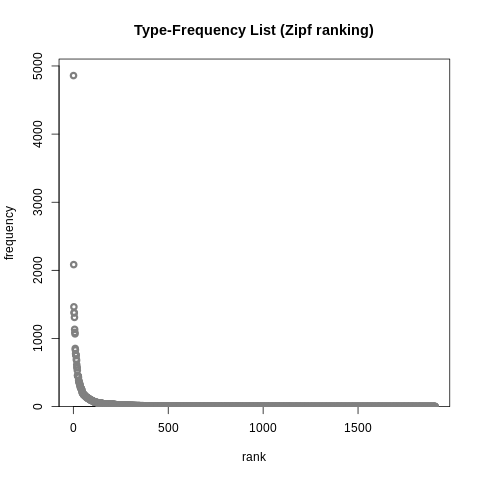

In [ ]:
%%R
plot(adv.tfl) # Type-Frequency List(Zipf ranking)

In [ ]:
corpus_df_0 = pd.read_parquet('split_corpus_df_0_pos_dp.parquet')

In [ ]:
corpus_df_0.head(10)

,sentence_id,untagged,pos_tagged,dp_parsed
0,NIRW2300000001.1.1,[영상]“위기를 이겨내고 일상으로” 부산 기관장 신년사,"[[[, SS], [영상, NNG], [], SS], [“, SS], [위기, NN...","[[[, punct], [영상], advmod], [“, compound], [위기..."
1,NIRW2300000001.1.2,취임 2년 차를 맞는 박형준 부산시장은 코로나19 위기를 이겨내고 있는 부산시민들에...,"[[취임, NNG], [2, SN], [년, NNB], [차, NNB], [를, J...","[[취임, compound], [2년, compound], [차를, obj], [맞..."
2,NIRW2300000001.1.3,"박 시장은 “코로나19는 번번이 우리의 희망의 길목을 막아섰고, 지금도 여전히 민생...","[[박, NNP], [시장, NNG], [은, JX], [“, SS], [코로나, ...","[[박, compound], [시장은, dislocated], [“, advmod]..."
3,NIRW2300000001.1.4,그러면서 “숱한 어려움을 헤쳐온 위대한 시민의 힘으로 2022년을 코로나를 극복하고...,"[[그러, VV], [면서, EC], [“, SS], [숱하, VA], [ㄴ, ET...","[[그러면서, cc], [“, advmod], [숱한, amod], [어려움을, o..."
4,NIRW2300000001.1.5,박 시장은 “치밀한 전략으로 2030세계박람회 유치를 위한 국제박람회기구 현지 실사...,"[[박, NNP], [시장, NNG], [은, JX], [“, SS], [치밀하, ...","[[박, compound], [시장은, dislocated], [“, advmod]..."
5,NIRW2300000001.1.6,"또, “부·울·경 특별자치단체 출범과 함께 수도권에 대응할 초광역 협력체계를 구축해...","[[또, MAG], [,, SP], [“, SS], [부·울·경, NNP], [특별...","[[또, cc], [,, punct], [“, compound], [부, conj]..."
6,NIRW2300000001.1.7,"박 시장은 “완전히 새로워지는 부산, 그 안에서 행복한 일상을 누리는 부산시민의 모...","[[박, NNP], [시장, NNG], [은, JX], [“, SS], [완전히, ...","[[박, compound], [시장은, dislocated], [“, advmod]..."
7,NIRW2300000001.1.8,"신상해 부산시의회 의장은 ‘따뜻한 회복, 중단없는 발전’을 위해 계속 전진해나가겠다...","[[신상해, NNP], [부산시의회, NNP], [의장, NNG], [은, JX],...","[[신상해, ccomp], [부산시의회, compound], [의장은, disloc..."
8,NIRW2300000001.1.9,신 의장은 “돌이켜보면 지난 한 해 부산은 고군분투하며 위기 속에 기회를 만드는 저...,"[[신, NNP], [의장, NNG], [은, JX], [“, SS], [돌이켜보,...","[[신, compound], [의장은, dislocated], [“, dep], [..."
9,NIRW2300000001.1.10,이어 “새해를 맞는 부산시의회 각오는 변함없이 결연하다”며 “코로나19 직격탄을 맞...,"[[이어, MAG], [“, SS], [새해, NNG], [를, JKO], [맞, ...","[[이어, ccomp], [“, obj], [새해를, conj], [맞는, acl]..."


In [ ]:
len(corpus_df_0)

899205

In [ ]:
corpus_df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899205 entries, 0 to 899204
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   sentence_id  899205 non-null  object
 1   untagged     899205 non-null  object
 2   pos_tagged   899205 non-null  object
 3   dp_parsed    899205 non-null  object
dtypes: object(4)
memory usage: 27.4+ MB


In [ ]:
corpus_df_0.dtypes

,0
sentence_id,object
untagged,object
pos_tagged,object
dp_parsed,object


In [ ]:
# '먹다', '마시다'와 공기하는 직접목적어를 찾고자 한다.
# 우선 해당하는 동사가 있는 행을 찾아서 추출한다. ['먹', 'VV'], ['마시', 'VV']
# 직접목적어에 해당하는 성분이 있는 경우 그 행을 추출한다. 'obj'

In [ ]:
%%R
먹_0_vec <- readLines("tokens_먹_0.txt", encoding="UTF-8")

In [ ]:
%%R
먹_0_tfl <- vec2tfl(먹_0_vec)

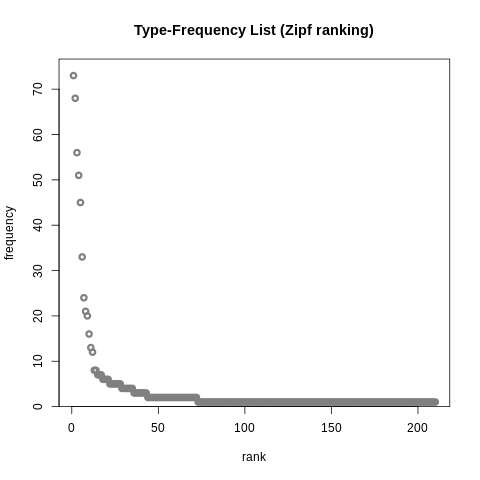

In [ ]:
%%R
plot(먹_0_tfl) # Type-Frequency List(Zipf ranking)

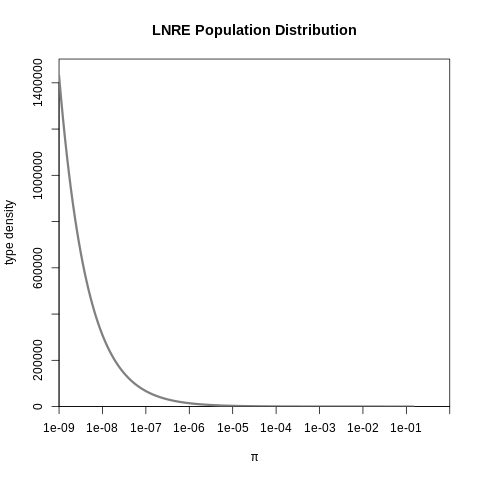

In [ ]:
%%R
plot(zm)

In [ ]:
%%R
head(먹_0_tfl, 10)

        k  f   type
마음    1 73   마음
음식    2 68   음식
밥      3 56     밥
애      4 51     애
한솥밥  5 45 한솥밥
술      6 33     술
욕      7 24     욕
점심    8 21   점심
겁      9 20     겁
약     10 16     약

   N   V
 776 210


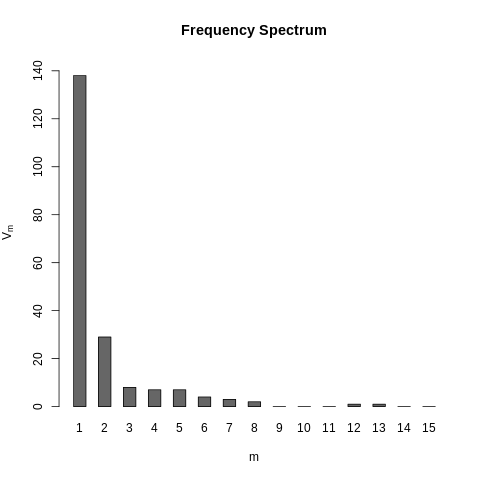

In [ ]:
%%R
먹_0_spc <- vec2spc(먹_0_vec)
plot(먹_0_spc)

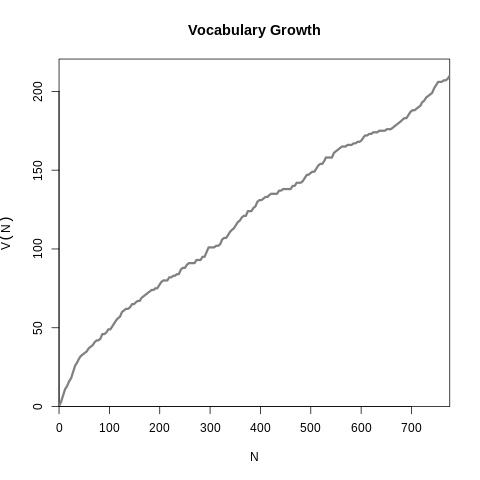

In [ ]:
%%R
먹_0_vgc <- vec2vgc(먹_0_vec)
plot(먹_0_vgc)

In [ ]:
%%R
zm <- lnre("zm",먹_0_spc)
zm

Zipf-Mandelbrot LNRE model.
Parameters:
   Shape:          alpha = 0.6652697 
   Upper cutoff:       B = 0.1443479 
 [ Normalization:      C = 0.6398318 ]
Population size: S = Inf 
Sampling method: Poisson, with exact calculations.

Parameters estimated from sample of size N = 776:
                  V     V1   V2    V3   V4   V5    
   Observed: 210.00 138.00 29.0  8.00 7.00 7.00 ...
   Expected: 211.14 142.78 23.9 10.63 6.21 4.14 ...

Goodness-of-fit (multivariate chi-squared test):
         X2 df         p
   2.089714  3 0.5539964


# 그냥

In [ ]:
split_corpus_df_9_pos = pd.read_parquet('split_corpus_df_9_pos.parquet')

In [ ]:
split_corpus_df_9_pos.head()

,sentence_id,untagged,pos_tagged
8092838,NWRW2300000005.14413.1,"네이버클라우드-KOTRA, 국내 ICT 기업 해외 진출 지원 협력","[[네이버클라우드, NNP], [-, SO], [KOTRA, NNP], [,, SP..."
8092839,NWRW2300000005.14413.2,네이버클라우드는 지난 28일 서울 염곡동에 위치한 KOTRA 본사에서 KOTRA와 ...,"[[네이버클라우드, NNP], [는, JX], [지나, VV], [ㄴ, ETM], ..."
8092840,NWRW2300000005.14413.3,이번 협약으로 업계 인지도와 해외 네트워크가 부족한 국내 중소 ICT·SW 기업의 ...,"[[이번, NNG], [협약, NNG], [으로, JKB], [업계, NNG], [..."
8092841,NWRW2300000005.14413.4,"네이버클라우드는 해외 진출이 유망한 ICT 분야의 중소기업과 스타트업을 발굴하고, ...","[[네이버클라우드, NNP], [는, JX], [해외, NNG], [진출, NNG]..."
8092842,NWRW2300000005.14413.5,이와 더불어 양사는 국내 중소기업의 해외 마케팅 지원 및 해외 진출 인큐베이팅에 함...,"[[이, NP], [와, JKB], [더불, VV], [어, EC], [양, MMN..."


In [ ]:
del split_corpus_df_9_pos